# Augmented Video Feedback's effect on Self-confidence and Actual Standing Backward Salto Tucked Performance
#### Authors: Mikkel Glavind Andersen & Niels Engedal
#### Date: Hand in 06/01/2025

# ---------------------------------------------------

## Importing Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Importing Data

### Setting up filepaths

In [2]:
data_dir = "/Users/niels/Desktop/University/Third Semester/Perception and Action/Exam/Gymnastics Motion Tracking/Code for Gym Tracking/Analyzed Data/Webcam_Backflip"
data_files = os.listdir(data_dir)
csv_files = [f for f in data_files if f.endswith('.csv')]
print(csv_files)

['id1_1_baseline.csv', 'id1_1_trajectory.csv', 'id6_1_baseline.csv', 'id7_1_baseline.csv', 'id8_1_baseline.csv', 'id5_1_trajectory.csv', 'id8_2_pure.csv', 'id8_3_pure.csv', 'id4_1_pure.csv', 'id2_4_pure.csv', 'id2_5_pure.csv', 'id5_3_trajectory.csv', 'id1_2_trajectory.csv', 'id2_1_baseline.csv', 'id1_5_trajectory.csv', 'id8_5_pure.csv', 'id8_4_pure.csv', 'id5_4_trajectory.csv', 'id5_1_baseline.csv', 'id2_3_pure.csv', 'id2_2_pure.csv', 'id4_1_baseline.csv', 'id5_5_trajectory.csv', 'id1_4_trajectory.csv', 'id3_1_baseline.csv', 'id1_3_trajectory.csv', 'id5_2_trajectory.csv', 'id6_1_pure.csv', 'id2_2_baseline.csv', 'id8_1_pure.csv', 'id4_4_baseline.csv', 'id4_3_pure.csv', 'id4_2_pure.csv', 'id2_5_baseline.csv', 'id4_3_baseline.csv', 'id3_3_baseline.csv', 'id3_1_trajectory.csv', 'id5_5_baseline.csv', 'id3_4_baseline.csv', 'id5_2_baseline.csv', 'id6_5_pure.csv', 'id4_2_baseline.csv', 'id6_4_pure.csv', 'id2_4_baseline.csv', 'id4_5_baseline.csv', 'id7_1_trajectory.csv', 'id2_3_baseline.csv', '

### Loading CSV-files and combining them, both per participant and as a whole
#### + Removing Videos with Problems

In [3]:
# read all csv files into a list of dataframes
dfs = [pd.read_csv(os.path.join(data_dir, f)) for f in csv_files]

full_df = pd.concat(dfs, ignore_index=True)

# List of videos to remove as dictionaries
videos_to_remove = [
    {'participant_id': 2, 'video_number': 1, 'condition': 'pure'},
    {'participant_id': 4, 'video_number': 2, 'condition': 'pure'},
    {'participant_id': 7, 'video_number': 1, 'condition': 'baseline'},
    {'participant_id': 7, 'video_number': 2, 'condition': 'trajectory'}
]

# Convert the list of dictionaries to a DataFrame for easy filtering
remove_df = pd.DataFrame(videos_to_remove)

# Filter out rows in full_df that match any combination in remove_df
full_df = full_df.merge(remove_df, on=['participant_id', 'video_number', 'condition'], how='left', indicator=True)
full_df = full_df[full_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Verify the result
print("Videos removed successfully.")
print(full_df.head())


Videos removed successfully.
   Frame#      time       Hip_X       Hip_Y      RHip_X      RHip_Y  \
0       0  0.000000  954.465183  592.234373  952.986294  587.805443   
1       1  0.033476  953.691926  594.401474  953.882184  590.558537   
2       2  0.066952  953.404472  596.738866  954.771469  593.311269   
3       3  0.100427  953.949229  599.256313  955.589461  595.994924   
4       4  0.133903  955.347528  601.763817  956.243502  598.449319   

      RKnee_X     RKnee_Y    RAnkle_X    RAnkle_Y  ...  LKnee_velocity  \
0  960.393304  695.553696  942.676710  803.284647  ...        0.000000   
1  960.475368  696.055094  942.356392  805.427975  ...        0.021559   
2  960.397278  696.789355  942.012139  807.478816  ...        0.029938   
3  960.103752  697.852616  941.629783  809.345375  ...        0.042747   
4  959.713688  699.249069  941.263943  810.958333  ...        0.054530   

   right_knee_ang_vel  left_knee_ang_vel  left_ankle_ang_vel  \
0            0.000000           0.0

In [4]:
print(f"Unique participants in full_df: {full_df['participant_id'].nunique()}")

print(f"Len of dfs: {len(dfs)}")

print(f"Shape of full_df: {np.shape(full_df)}")

Unique participants in full_df: 8
Len of dfs: 80
Shape of full_df: (13604, 149)


In [5]:
# find all column names
print(full_df.columns)

# find all hip columns
hip_columns = [c for c in full_df.columns if 'hip' in c]
print()
print(hip_columns)

Index(['Frame#', 'time', 'Hip_X', 'Hip_Y', 'RHip_X', 'RHip_Y', 'RKnee_X',
       'RKnee_Y', 'RAnkle_X', 'RAnkle_Y',
       ...
       'LKnee_velocity', 'right_knee_ang_vel', 'left_knee_ang_vel',
       'left_ankle_ang_vel', 'right_ankle_ang_vel', 'left_hip_ang_vel',
       'right_hip_ang_vel', 'Trunk_Leg_Angle', 'Thigh_Leg_Angle',
       'Likert_Score'],
      dtype='object', length=149)

['left_hip', 'right_hip', 'left_hip_ang_vel', 'right_hip_ang_vel']


In [6]:
print(full_df.head())

   Frame#      time       Hip_X       Hip_Y      RHip_X      RHip_Y  \
0       0  0.000000  954.465183  592.234373  952.986294  587.805443   
1       1  0.033476  953.691926  594.401474  953.882184  590.558537   
2       2  0.066952  953.404472  596.738866  954.771469  593.311269   
3       3  0.100427  953.949229  599.256313  955.589461  595.994924   
4       4  0.133903  955.347528  601.763817  956.243502  598.449319   

      RKnee_X     RKnee_Y    RAnkle_X    RAnkle_Y  ...  LKnee_velocity  \
0  960.393304  695.553696  942.676710  803.284647  ...        0.000000   
1  960.475368  696.055094  942.356392  805.427975  ...        0.021559   
2  960.397278  696.789355  942.012139  807.478816  ...        0.029938   
3  960.103752  697.852616  941.629783  809.345375  ...        0.042747   
4  959.713688  699.249069  941.263943  810.958333  ...        0.054530   

   right_knee_ang_vel  left_knee_ang_vel  left_ankle_ang_vel  \
0            0.000000           0.000000            0.000000   


# Preprocessing of Data (Hip Height & Horizontal Displacement Measure)

We want to do the following:
- Create a dataframe with columns: Participant_id, Condition, Baseline Hip Height (Aggregate), Max Hip Height, Video_number, Likert_scale

- Encode "pure" as 0 and "trajectory" as 1


- Identify peak hip height
- Select only 20% to each side of peak hip height

- Remove problematic videos
    - id2_1_pure - springes slet ikke
    - id4_2_pure - starter efter take-off dip kan identificeres
    - id3_2_baseline - ok, men lidt mærkelig timing på grafen?
    - id3_4_trajectory - der er to spikes, selvom videon kun viser 1?
    - id4_3_baseline - ok, men lidt mærkelig timing på grafen?
    - 

-----------------------------------------------------



- Track vertical displacement
    - Define standing hip-height per video
    - ? Define baseline standing hip height ?
    - Calculate peak hip height per video
    - Calculate vertical displacement in baseline videos (baseline_hip_height - standing_hip_height)
    - Calculate vertical displacement in condition videos (cond_hip_height - standing_hip_height)
        - OBS: for participant_id 7 "trajectory" videos 1&2 use standing_hip_height from video 3 "trajectory"


- Track horizontal displacement by take-off and landing position of foot (ankle)
    - Define when take-off and landing happen (peak-detection) of ankle_Y (lowest dip on each side of max value!)
    - Store X-coordinate for ankle at these points
    - Calculate horizontal displacement per video
    - Aggregate baseline horizontal displacement

- Calculate "Correct_Likert" - Done after all of the above has been done
    We basically just give half a point if they state that their skill is better than average and it is only better in one of the two aspects, if they state that it is worse than average and it is in fact worse than their baseline we give 0.5 points per element that is actually worse than baseline

    - Following logic should be done for each participant_id, video_number combination and added as the value for "Correct_Likert" in the final_df dataframe:
        score = 0 # start with score = 0
         if "Likert_Score" > 3.0:
            if horizontal_displacement_baseline < horizontal_displacement_cond:
                score += 0.5
            if vertical_displacement_baseline < vertical_displacement_cond:
                score += 0.5
            continue
        
        elif "Likert_Score" < 4.0:
            if horizontal_displacement_baseline > horizontal_displacement_cond:
                score += 0.5
            if vertical_displacement_baseline > vertical_displacement_cond:
                score += 0.5
            continue

        else:
            score = 0

/var/folders/d1/wz94bbps7fd0qztxm8nljlww0000gn/T/ipykernel_75303/3760625213.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df = full_df.groupby(['participant_id', 'video_number', 'condition'], group_keys=False).apply(reorient_and_flip_y_columns)


<Axes: >

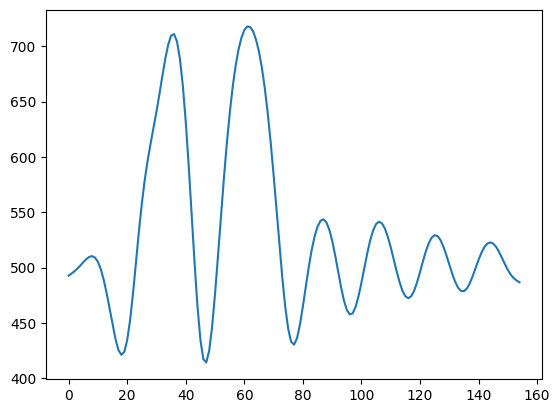

In [7]:
# Identify all _Y columns dynamically
y_columns = [col for col in full_df.columns if col.endswith('_Y')]

# Step 1: Reorient and flip _Y columns relative to Hip_Y maximum for each group
def reorient_and_flip_y_columns(group):
    """
    Shift and flip all _Y columns relative to the maximum Hip_Y value.
    """
    for col in y_columns:
        group[col] = -group[col] + 1080  # Flip and shift Y-axis orientation
    return group

# Apply the reorientation group-wise
full_df = full_df.groupby(['participant_id', 'video_number', 'condition'], group_keys=False).apply(reorient_and_flip_y_columns)

p6_1_bsl = full_df[(full_df['participant_id'] == 6) & (full_df['video_number'] == 1) & (full_df['condition'] == 'baseline')].reset_index(drop=True)

p6_1_bsl['Hip_Y'].plot(label='Hip_Y')


## Cut id6_1_baseline short to avoid detecting wrong peak

Before filtering, full_df has 13604 rows.
After filtering, full_df has 13500 rows.


<Axes: >

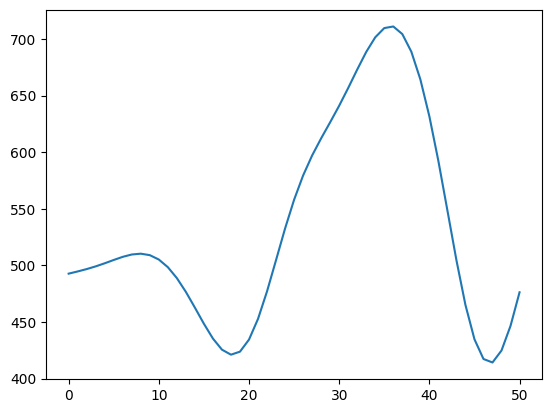

In [8]:
print(f"Before filtering, full_df has {len(full_df)} rows.")

# Step 1: Define the group to filter
target_group = (full_df['participant_id'] == 6) & \
               (full_df['video_number'] == 1) & \
               (full_df['condition'] == 'baseline')

# Step 2: Filter the rows for this group
group_df = full_df[target_group].reset_index(drop=True)  # Reset index for clean slicing

# Step 3: Keep only rows up to index 525 for this group
filtered_group_df = group_df.loc[group_df.index <=50]

# Step 4: Update full_df
# Drop the original rows for this group
full_df = full_df[~target_group]

# Append the filtered rows back into full_df
full_df = pd.concat([full_df, filtered_group_df], axis=0).sort_index().reset_index(drop=True)

# Step 5: Verify the result
print(f"After filtering, full_df has {len(full_df)} rows.")

# Step 1: Define the group to filter

sample_backflip = full_df[(full_df['participant_id'] == 6) & (full_df['video_number'] == 1) & (full_df['condition'] == 'baseline')].reset_index(drop=True)
sample_backflip['Hip_Y'].plot(label='Hip_Y After Cutting')

   Frame#      time       Hip_X       Hip_Y      RHip_X      RHip_Y  \
0       1  0.033476  953.691926  485.598526  953.882184  489.441463   
1       2  0.066952  953.404472  483.261134  954.771469  486.688731   
2       3  0.100427  953.949229  480.743687  955.589461  484.005076   
3       4  0.133903  955.347528  478.236183  956.243502  481.550681   
4       5  0.167379  957.183869  476.035052  956.684424  479.532490   

      RKnee_X     RKnee_Y    RAnkle_X    RAnkle_Y  ...  LKnee_velocity  \
0  960.475368  383.944906  942.356392  274.572025  ...        0.021559   
1  960.397278  383.210645  942.012139  272.521184  ...        0.029938   
2  960.103752  382.147384  941.629783  270.654625  ...        0.042747   
3  959.713688  380.750931  941.263943  269.041667  ...        0.054530   
4  959.458330  379.046796  941.080905  267.738133  ...        0.059694   

   right_knee_ang_vel  left_knee_ang_vel  left_ankle_ang_vel  \
0           -9.385049          49.365698           31.174513   


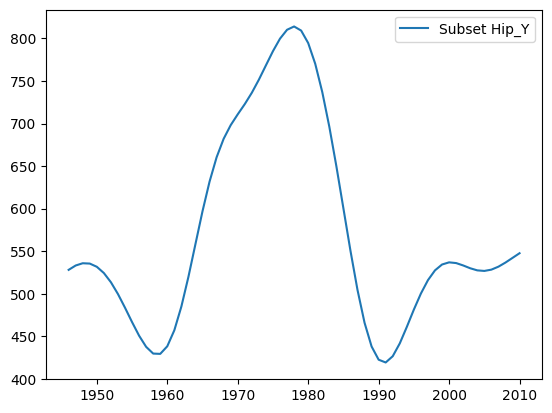

In [9]:
# Step 2: Extract rows around the maximum Hip_Y
subset_rows = []  # List to store rows for each group

for (pid, vid, cond), group in full_df.groupby(['participant_id', 'video_number', 'condition']):
    # Reset index to work with group-relative positions
    group = group.reset_index(drop=True)
    
    # if group is participant_id 6, video_number 1, and condition baseline
    if pid == 6 and vid == 1 and cond == 'baseline':
        # use all data points in group
        subset_rows.append(group)
    else:
        max_index = group['Hip_Y'].idxmax()
        
        # Define the range: 15% of the data to the left and right
        total_rows = len(group)
        range_size = int(total_rows * 0.20)  # 15% of the group's size

        
        # Get the start and end index around the max
        start_idx = max(0, max_index - range_size)
        end_idx = min(len(group) - 1, max_index + range_size)
        # Append the subset of rows to the list
        subset_rows.append(group.loc[start_idx:end_idx])

# Step 3: Combine all the subsets into a final DataFrame
subset_df = pd.concat(subset_rows, axis=0).reset_index(drop=True)

# Step 4: Verify the result
print(subset_df.head()) 
print(f"Original size: {len(full_df)}, Subset size: {len(subset_df)}")

# Step 5 - Visualize the result for a single group
sample_backflip = subset_df[
    (subset_df['participant_id'] == 3) &
    (subset_df['video_number'] == 2) &
    (subset_df['condition'] == 'baseline')
]

sample_backflip['Hip_Y'].plot(label='Subset Hip_Y')
plt.legend()
plt.show()

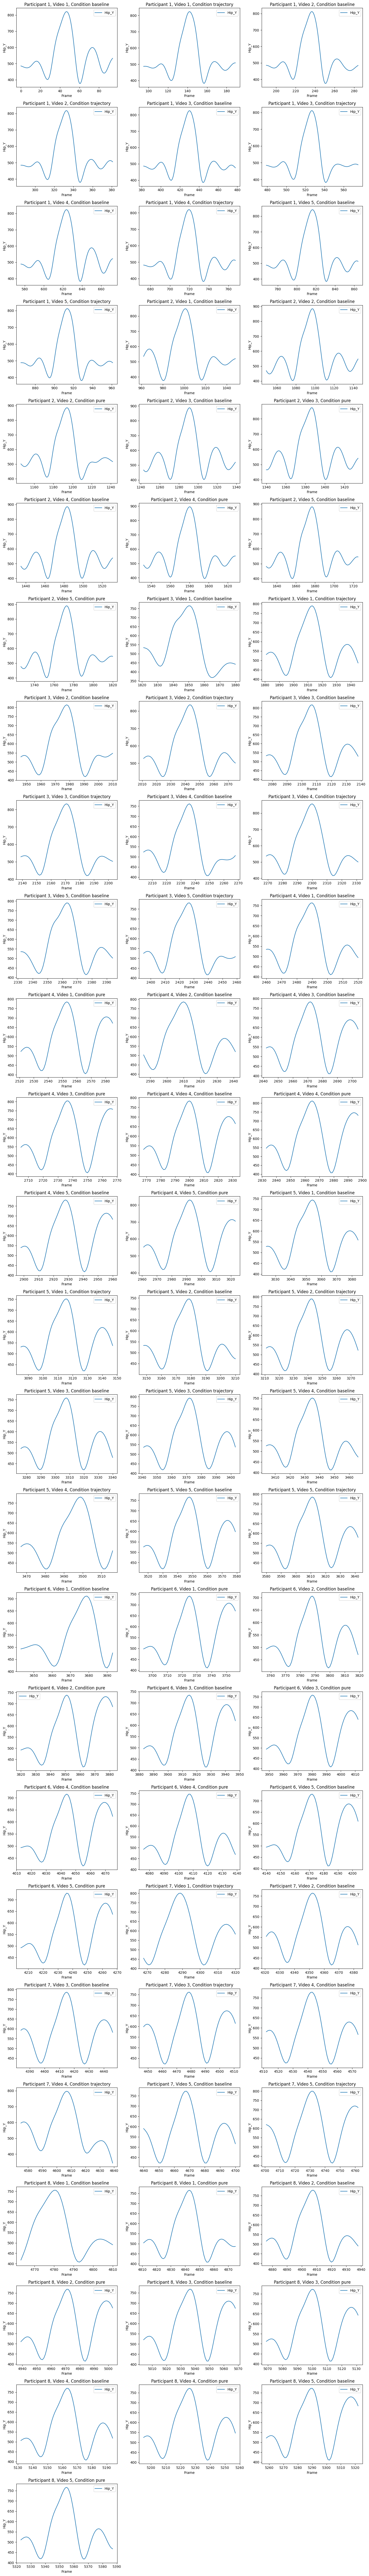

In [10]:
import matplotlib.pyplot as plt
import math

# Step 6: Plot all groups' Hip_Y
# Get unique group combinations
unique_groups = subset_df[['participant_id', 'video_number', 'condition']].drop_duplicates()

# Set up the number of rows and columns for subplots
num_groups = len(unique_groups)
num_cols = 3  # Set the number of columns you want
num_rows = math.ceil(num_groups / num_cols)  # Calculate rows needed

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Loop through each group and plot
for i, (_, group) in enumerate(unique_groups.iterrows()):
    pid, vid, cond = group['participant_id'], group['video_number'], group['condition']
    
    # Filter the data for the current group
    group_data = subset_df[
        (subset_df['participant_id'] == pid) &
        (subset_df['video_number'] == vid) &
        (subset_df['condition'] == cond)
    ]
    
    # Plot the Hip_Y values
    axes[i].plot(group_data['Hip_Y'], label='Hip_Y')
    axes[i].set_title(f'Participant {pid}, Video {vid}, Condition {cond}')
    axes[i].legend()
    axes[i].set_xlabel('Frame')
    axes[i].set_ylabel('Hip_Y')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Calculating Baseline aggregates and condition values

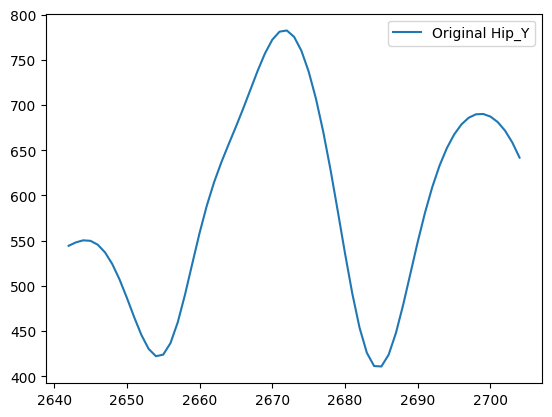

In [11]:
from plotting_functions import plot_joint_trajectory

# Select a single backflip for plotting (participant 1, video 1, trajectory condition from subset_df)
sample_backflip = subset_df[
    (subset_df['participant_id'] == 4) &
    (subset_df['video_number'] == 3) &
    (subset_df['condition'] == 'baseline')
]

#print(sample_backflip['Hip_Y'].head(50))
# Plot both the original and the inverted Hip_Y
sample_backflip['Hip_Y'].plot(label='Original Hip_Y')
#inv_sample_backflip['Hip_Y'].plot(label='Inverted Hip_Y')

plt.legend()
plt.show()
 
# invert y-axis
#sample_backflip['Hip_Y'] = -sample_backflip['Hip_Y']

#plot_joint_trajectory(sample_backflip, joint_name="Hip", title="Sample Backflip Trajectory")

# Identifying take off and landing - Calculating Horizontal displacement

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

def find_takeoff_landing(group, min_distance=5, max_distance=25):
    """
    Identifies the largest dips (take-off and landing) before and after the Hip_Y maximum,
    ensuring dips are within a specified range (min_distance to max_distance) from the peak.
    Returns both local and global indices, as well as Hip_X and Hip_Y values.
    
    Parameters:
    - group: The group DataFrame.
    - min_distance: Minimum distance from the peak to look for dips.
    - max_distance: Maximum distance from the peak to look for dips.
    """
    # Reset index for group-local operations and preserve global indices
    group = group.reset_index()  # Original index is stored in 'index'

    # Find the local index of the maximum Hip_Y
    max_idx_local = group['Hip_Y'].idxmax()

    # Define the valid range for take-off search
    take_off_start = max(0, max_idx_local - max_distance)
    take_off_end = max(0, max_idx_local - min_distance)
    take_off_idx_local = group.loc[take_off_start:take_off_end, 'Hip_Y'].idxmin()

    # Define the valid range for landing search
    landing_start = min(len(group) - 1, max_idx_local + min_distance)
    landing_end = min(len(group) - 1, max_idx_local + max_distance)
    landing_idx_local = group.loc[landing_start:landing_end, 'Hip_Y'].idxmin()

    # Retrieve global indices from the reset index
    take_off_idx_global = group.loc[take_off_idx_local, 'index']
    landing_idx_global = group.loc[landing_idx_local, 'index']

    # Retrieve Hip_X and Hip_Y values
    take_off_Hip_X = group.loc[take_off_idx_local, 'Hip_X']
    landing_Hip_X = group.loc[landing_idx_local, 'Hip_X']
    take_off_Hip_Y = group.loc[take_off_idx_local, 'Hip_Y']
    landing_Hip_Y = group.loc[landing_idx_local, 'Hip_Y']

    # Return both local and global indices with their corresponding values
    return {
        'take_off_idx_local': take_off_idx_local,
        'landing_idx_local': landing_idx_local,
        'take_off_idx_global': take_off_idx_global,
        'landing_idx_global': landing_idx_global,
        'take_off_Hip_X': take_off_Hip_X,
        'landing_Hip_X': landing_Hip_X,
        'take_off_Hip_Y': take_off_Hip_Y,
        'landing_Hip_Y': landing_Hip_Y
    }






def plot_trajectory_with_markers(group, results, title):
    """
    Plots the Hip_Y trajectory and marks take-off and landing points using global indices.
    """
    plt.figure(figsize=(4, 2))
    
    # Plot the Hip_Y trajectory
    plt.plot(group.index, group['Hip_Y'], label='Hip_Y Trajectory')

    # Mark take-off point using global index
    plt.scatter(results['take_off_idx_global'], results['take_off_Hip_Y'], 
                color='red', label='Take-Off', zorder=5)
    plt.text(results['take_off_idx_global'], results['take_off_Hip_Y'], 'Take-Off', color='red')

    # Mark landing point using global index
    plt.scatter(results['landing_idx_global'], results['landing_Hip_Y'], 
                color='green', label='Landing', zorder=5)
    plt.text(results['landing_idx_global'], results['landing_Hip_Y'], 'Landing', color='green')

    # Add title and labels
    plt.title(title)
    plt.xlabel('Frame Index')
    plt.ylabel('Hip_Y')
    plt.legend()
    plt.show()


import matplotlib.pyplot as plt
import math

def process_and_plot_trajectories(subset_df, plot=True, columns=3):
    """
    Processes each group to identify take-off and landing points,
    calculate horizontal displacement, and plot the Hip_Y trajectory.
    Returns a summary dataframe with displacement results.
    """
    results_list = []  # List to store results for each group
    print(f"Plotting set to {plot}")

    # Get unique groups and count
    unique_groups = list(subset_df.groupby(['participant_id', 'video_number', 'condition']).groups.keys())
    num_groups = len(unique_groups)
    
    # Set up grid layout for plotting
    if plot:
        rows = math.ceil(num_groups / columns)  # Calculate number of rows
        fig, axes = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows))  # Adjust figure size
        axes = axes.flatten()  # Flatten to easily index axes

    # Loop through each group
    for idx, ((pid, vid, cond), group) in enumerate(subset_df.groupby(['participant_id', 'video_number', 'condition'])):
        # Find take-off and landing points
        results = find_takeoff_landing(group)
        
        # Calculate horizontal displacement
        displacement = results['take_off_Hip_X'] - results['landing_Hip_X']
        results['horizontal_displacement'] = displacement
        results['horizontal_displacement_abs'] = abs(displacement)
        
        # Append group identifiers
        results['participant_id'] = pid
        results['video_number'] = vid
        results['condition'] = cond
        results_list.append(results)
        
        # Plot the trajectory in the grid
        if plot:
            ax = axes[idx]
            ax.plot(group.index, group['Hip_Y'], label='Hip_Y Trajectory')
            ax.scatter(results['take_off_idx_global'], results['take_off_Hip_Y'], color='red', label='Take-Off')
            ax.scatter(results['landing_idx_global'], results['landing_Hip_Y'], color='green', label='Landing')
            ax.set_title(f"PID {pid}, Vid {vid}, Cond {cond}")
            ax.set_xlabel("Frame Index")
            ax.set_ylabel("Hip_Y")
            ax.legend()

    # Hide unused subplots
    if plot:
        for j in range(idx + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()

    # Create a summary dataframe
    summary_df = pd.DataFrame(results_list)
    return summary_df


# Run the process
summary_df = process_and_plot_trajectories(subset_df, plot=False, columns=5)

# Display the summary results
display(summary_df)



Plotting set to False


,take_off_idx_local,landing_idx_local,take_off_idx_global,landing_idx_global,take_off_Hip_X,landing_Hip_X,take_off_Hip_Y,landing_Hip_Y,horizontal_displacement,horizontal_displacement_abs,participant_id,video_number,condition
0,27,61,27,61,930.931038,916.015113,401.154475,377.146227,14.915926,14.915926,1,1,baseline
1,28,62,123,157,906.910015,866.669385,399.642689,381.707255,40.240631,40.240631,1,1,trajectory
2,27,61,217,251,917.473422,882.712261,399.864999,374.917891,34.761161,34.761161,1,2,baseline
3,28,62,313,347,900.690243,928.479580,396.644889,378.948530,-27.789337,27.789337,1,2,trajectory
4,29,62,411,444,930.237189,936.683442,398.813857,385.725055,-6.446253,6.446253,1,3,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13,43,5082,5112,936.733700,901.782510,420.513902,413.340437,34.951191,34.951191,8,3,pure
72,13,44,5145,5176,950.334779,884.618857,424.436713,407.226833,65.715922,65.715922,8,4,baseline
73,13,43,5208,5238,938.523167,898.330013,418.329332,410.318493,40.193154,40.193154,8,4,pure
74,13,44,5271,5302,955.104292,879.514782,421.693131,409.719414,75.589509,75.589509,8,5,baseline


In [13]:
# pick participant 3, video 2, baseline condition
sample_backflip = summary_df[
    (summary_df['participant_id'] == 3) &
    (summary_df['video_number'] == 2) &
    (summary_df['condition'] == 'baseline')
]

print(np.shape(sample_backflip))

sample_backflip.head()

(1, 13)


,take_off_idx_local,landing_idx_local,take_off_idx_global,landing_idx_global,take_off_Hip_X,landing_Hip_X,take_off_Hip_Y,landing_Hip_Y,horizontal_displacement,horizontal_displacement_abs,participant_id,video_number,condition
21,13,45,1959,1991,1001.276653,1320.295436,429.324582,419.217051,-319.018783,319.018783,3,2,baseline


# Creating final_df - Aggregating Baseline Metrics and Finding Condition Metrics

In [14]:
# Filter rows where the condition is "baseline"
baseline_df = subset_df[subset_df["condition"] == "baseline"]

# Group by participant and video, then calculate max Hip_Y
max_baseline_hip_heights = baseline_df.groupby(["participant_id", "video_number"])["Hip_Y"].max()

# Take the mean of these max values for each participant
avg_max_baseline_hip_heights = (
    max_baseline_hip_heights.groupby("participant_id").mean().reset_index()
)

# Rename the column for clarity
avg_max_baseline_hip_heights = avg_max_baseline_hip_heights.rename(
    columns={"Hip_Y": "baseline_hip_height"}
)

print("Average Max Baseline Hip Heights:")
print(avg_max_baseline_hip_heights)


# Filter rows where condition is not "baseline"
non_baseline_df = subset_df[subset_df["condition"] != "baseline"]

# Extract relevant columns for non-baseline conditions
no_bsl_df = non_baseline_df[["participant_id", "video_number", "condition", "Likert_Score"]].drop_duplicates()

# Group by participant, video, and condition to find the max Hip_Y
max_cond_hip_heights = (
    non_baseline_df.groupby(["participant_id", "video_number", "condition"])["Hip_Y"]
    .max()
    .reset_index()
    .rename(columns={"Hip_Y": "cond_hip_height"})
)

# Merge max_cond_hip_heights with no_bsl_df
no_bsl_df = no_bsl_df.merge(max_cond_hip_heights, on=["participant_id", "video_number", "condition"])


# Merge baseline heights with non-baseline data
final_df = no_bsl_df.merge(
    avg_max_baseline_hip_heights, on="participant_id", how="left"
)

print("Merged Data:")
print(final_df.head())


print("=" * 40)
print("Data Integrity Check:")
print(f"Unique participants: {final_df['participant_id'].nunique()}")
print(f"Unique video numbers: {final_df['video_number'].nunique()}")
print(f"Unique conditions: {final_df['condition'].unique()}")
print(f"Final dataframe shape: {final_df.shape}")
print("=" * 40)


# Select and reorder columns to match the desired output
final_df = final_df[
    ["participant_id", "video_number", "condition", "baseline_hip_height", "cond_hip_height", "Likert_Score"]
]

print("Final DataFrame:")
print(final_df.head())

# Confirm dimensions
assert final_df.shape[1] == 6, "Final DataFrame should have exactly 6 columns."

# encode the condition as "pure" = 0, "trajectory" = 1
final_df["condition"] = final_df["condition"].apply(lambda x: 0 if x == "pure" else 1)

Average Max Baseline Hip Heights:
   participant_id  baseline_hip_height
0               1           824.689531
1               2           877.185643
2               3           789.545608
3               4           779.007427
4               5           752.874903
5               6           719.262242
6               7           774.953830
7               8           768.370104
Merged Data:
   participant_id  video_number   condition  Likert_Score  cond_hip_height  \
0               1             1  trajectory           4.0       823.345907   
1               1             2  trajectory           4.0       817.152738   
2               1             3  trajectory           5.0       810.869335   
3               1             4  trajectory           4.0       818.714329   
4               1             5  trajectory           4.0       811.562956   

   baseline_hip_height  
0           824.689531  
1           824.689531  
2           824.689531  
3           824.689531  
4       

In [15]:
from IPython.display import display

# Display the DataFrame in an interactive table format
final_df = final_df.sort_values(by=["participant_id", "video_number"]).reset_index(drop=True)
display(final_df)

,participant_id,video_number,condition,baseline_hip_height,cond_hip_height,Likert_Score
0,1,1,1,824.689531,823.345907,4.0
1,1,2,1,824.689531,817.152738,4.0
2,1,3,1,824.689531,810.869335,5.0
3,1,4,1,824.689531,818.714329,4.0
4,1,5,1,824.689531,811.562956,4.0
5,2,2,0,877.185643,885.529952,4.0
6,2,3,0,877.185643,873.076828,5.0
7,2,4,0,877.185643,895.382145,3.0
8,2,5,0,877.185643,890.238045,5.0
9,3,1,1,789.545608,789.656915,3.0


In [16]:
# Step 1: Filter summary_df for the "baseline" condition
baseline_summary = summary_df[summary_df["condition"] == "baseline"]

# Step 2: Aggregate horizontal_displacement and horizontal_displacement_abs per participant
agg_baseline_summary = baseline_summary.groupby("participant_id").agg({
    "horizontal_displacement": "mean",
    "horizontal_displacement_abs": "mean"
}).reset_index()

# Step 3: Rename columns for clarity (optional, based on merge requirements)
agg_baseline_summary.rename(columns={
    "horizontal_displacement": "baseline_horizontal_displacement",
    "horizontal_displacement_abs": "baseline_horizontal_displacement_abs"
}, inplace=True)

# Step 4: Merge the result into final_df
final_df = final_df.merge(agg_baseline_summary, on="participant_id", how="left")


## Merging cond_horizontal_displacement and cond_horizontal_displacement_abs into final_df

In [17]:
# Step 1: Filter summary_df for the "baseline" condition
cond_summary = summary_df[summary_df["condition"] != "baseline"]

# select only columns horizontal_displacement and horizontal_displacement_abs and participant_id
cond_summary = cond_summary[["participant_id", "video_number", "horizontal_displacement", "horizontal_displacement_abs"]]

# Step 2: Rename columns for clarity (optional, based on merge requirements)
cond_summary.rename(columns={
    "horizontal_displacement": "cond_horizontal_displacement",
    "horizontal_displacement_abs": "cond_horizontal_displacement_abs"
}, inplace=True)

print(f"Shape of cond_summary: {np.shape(cond_summary)}")


# Step 3: Merge the result into final_df
final_df = final_df.merge(cond_summary, on=["participant_id", "video_number"], how="left")


Shape of cond_summary: (37, 4)


# Final_df ready for analysis

In [18]:
# view final_df
display(final_df.head(37))
print(f"Shape of final_df: {np.shape(final_df)}")

,participant_id,video_number,condition,baseline_hip_height,cond_hip_height,Likert_Score,baseline_horizontal_displacement,baseline_horizontal_displacement_abs,cond_horizontal_displacement,cond_horizontal_displacement_abs
0,1,1,1,824.689531,823.345907,4.0,28.843726,31.422227,40.240631,40.240631
1,1,2,1,824.689531,817.152738,4.0,28.843726,31.422227,-27.789337,27.789337
2,1,3,1,824.689531,810.869335,5.0,28.843726,31.422227,-1.940445,1.940445
3,1,4,1,824.689531,818.714329,4.0,28.843726,31.422227,70.268664,70.268664
4,1,5,1,824.689531,811.562956,4.0,28.843726,31.422227,69.324800,69.324800
5,2,2,0,877.185643,885.529952,4.0,159.495069,159.495069,39.053490,39.053490
6,2,3,0,877.185643,873.076828,5.0,159.495069,159.495069,157.296479,157.296479
7,2,4,0,877.185643,895.382145,3.0,159.495069,159.495069,160.527436,160.527436
8,2,5,0,877.185643,890.238045,5.0,159.495069,159.495069,187.843683,187.843683
9,3,1,1,789.545608,789.656915,3.0,-134.140319,134.140319,-82.242572,82.242572


Shape of final_df: (37, 10)


## Implementing Performance Score
It should be calculated as follows:

Horizontal-displacement_abs: **Absolute Difference** between take-off_hip_x and landing_hip_x

Vertical-displacement-diff: Difference between baseline average max hip height and video max hip height
Horizontal-displacement-diff: Difference between baseline average horizontal displacement_abs and video horizontal displacement

Performance Score: Vertical-displacement-diff - Horizontal-displacement-diff

In [19]:
# calculate "baseline_performance_score" as the difference between baseline_hip_height and baseline_horizontal_displacement_abs
final_df["baseline_performance_score"] = final_df["baseline_hip_height"] - final_df["baseline_horizontal_displacement_abs"]
final_df["cond_performance_score"] = final_df["cond_hip_height"] - final_df["cond_horizontal_displacement_abs"]

In [20]:
display(final_df.head(37))

,participant_id,video_number,condition,baseline_hip_height,cond_hip_height,Likert_Score,baseline_horizontal_displacement,baseline_horizontal_displacement_abs,cond_horizontal_displacement,cond_horizontal_displacement_abs,baseline_performance_score,cond_performance_score
0,1,1,1,824.689531,823.345907,4.0,28.843726,31.422227,40.240631,40.240631,793.267304,783.105276
1,1,2,1,824.689531,817.152738,4.0,28.843726,31.422227,-27.789337,27.789337,793.267304,789.363401
2,1,3,1,824.689531,810.869335,5.0,28.843726,31.422227,-1.940445,1.940445,793.267304,808.928890
3,1,4,1,824.689531,818.714329,4.0,28.843726,31.422227,70.268664,70.268664,793.267304,748.445666
4,1,5,1,824.689531,811.562956,4.0,28.843726,31.422227,69.324800,69.324800,793.267304,742.238157
5,2,2,0,877.185643,885.529952,4.0,159.495069,159.495069,39.053490,39.053490,717.690574,846.476462
6,2,3,0,877.185643,873.076828,5.0,159.495069,159.495069,157.296479,157.296479,717.690574,715.780349
7,2,4,0,877.185643,895.382145,3.0,159.495069,159.495069,160.527436,160.527436,717.690574,734.854710
8,2,5,0,877.185643,890.238045,5.0,159.495069,159.495069,187.843683,187.843683,717.690574,702.394361
9,3,1,1,789.545608,789.656915,3.0,-134.140319,134.140319,-82.242572,82.242572,655.405289,707.414342


## Implementing Error Score on Likert-accuracy
Pseudo code for it:
Correct = 1
Error = 0

Hvis baseline_hip_height er større end cond_hip_height OG Likert-score < 4.0 = 1
Elif baseline_hip_height er mindre end cond_hip_height OG Likert-score > 3.0 = 1

else
Correct = 0


In [21]:
final_df["Correct_Likert"] = np.where(
    ((final_df["baseline_performance_score"]>final_df["cond_performance_score"]) & (final_df["Likert_Score"]<4.0)) |
    ((final_df["baseline_performance_score"]<final_df["cond_performance_score"]) & (final_df["Likert_Score"]>3.0)),
    1, 0
)


print(final_df["Correct_Likert"].value_counts())
print()

for cond in final_df["condition"].unique():
    print(f"Condition: {cond}")
    print(final_df[final_df["condition"]==cond]["Correct_Likert"].value_counts())
    print()

display(final_df)

Correct_Likert
1    25
0    12
Name: count, dtype: int64

Condition: 1
Correct_Likert
1    12
0     7
Name: count, dtype: int64

Condition: 0
Correct_Likert
1    13
0     5
Name: count, dtype: int64



,participant_id,video_number,condition,baseline_hip_height,cond_hip_height,Likert_Score,baseline_horizontal_displacement,baseline_horizontal_displacement_abs,cond_horizontal_displacement,cond_horizontal_displacement_abs,baseline_performance_score,cond_performance_score,Correct_Likert
0,1,1,1,824.689531,823.345907,4.0,28.843726,31.422227,40.240631,40.240631,793.267304,783.105276,0
1,1,2,1,824.689531,817.152738,4.0,28.843726,31.422227,-27.789337,27.789337,793.267304,789.363401,0
2,1,3,1,824.689531,810.869335,5.0,28.843726,31.422227,-1.940445,1.940445,793.267304,808.928890,1
3,1,4,1,824.689531,818.714329,4.0,28.843726,31.422227,70.268664,70.268664,793.267304,748.445666,0
4,1,5,1,824.689531,811.562956,4.0,28.843726,31.422227,69.324800,69.324800,793.267304,742.238157,0
5,2,2,0,877.185643,885.529952,4.0,159.495069,159.495069,39.053490,39.053490,717.690574,846.476462,1
6,2,3,0,877.185643,873.076828,5.0,159.495069,159.495069,157.296479,157.296479,717.690574,715.780349,0
7,2,4,0,877.185643,895.382145,3.0,159.495069,159.495069,160.527436,160.527436,717.690574,734.854710,0
8,2,5,0,877.185643,890.238045,5.0,159.495069,159.495069,187.843683,187.843683,717.690574,702.394361,0
9,3,1,1,789.545608,789.656915,3.0,-134.140319,134.140319,-82.242572,82.242572,655.405289,707.414342,0


# ANCOVA

### Hip-height

In [22]:
import pingouin as pg

ancova = pg.ancova(data=final_df, dv="cond_performance_score", covar="baseline_performance_score", between="condition")

ancova

,Source,SS,DF,F,p-unc,np2
0,condition,194.739794,1,0.073866,0.787432,0.002168
1,baseline_performance_score,79234.531790,1,30.054195,0.000004,0.469199
2,Residual,89637.206662,34,NaN,NaN,NaN


### Likert-score

In [23]:
# select Correct_Likert for each condition
pure_correct_likert = final_df[final_df["condition"]==0]["Correct_Likert"]
traj_correct_likert = final_df[final_df["condition"]==1]["Correct_Likert"]

null_hypo_directional = pg.ttest(pure_correct_likert, traj_correct_likert, paired=True, alternative="less")

null_hypo_directional

/Users/niels/miniconda3/envs/GymSports2D/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.576422,34.989921,less,0.71599,"[-inf, 0.36]",0.189214,0.726,0.013582


# DUMP